In [269]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [280]:
import numpy as np
import torch as tr
import torchvision as tv
from collections import Counter

In [297]:
from matplotlib import cm
from matplotlib import style
from matplotlib import pyplot as plt
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.datasets import MNIST

In [392]:
style.use(style.available[14])

In [393]:
from modules.commons import SingleZTransform
from utils import tr_utils

In [485]:
means = [2., 3]
cov = [[10, 2.],
       [2, 1.5]]
transform = SingleZTransform([means, cov], requires_grad=True)
n = 1000

In [489]:
tr.svd(tr.tensor(cov))

(tensor([[-0.9759, -0.2182],
         [-0.2182,  0.9759]]),
 tensor([10.4471,  1.0529]),
 tensor([[-0.9759, -0.2182],
         [-0.2182,  0.9759]]))

In [486]:
N = tr.tensor(np.random.normal(0, 1, (n, 2)), dtype=tr.float32)
X = tr.tensor(np.random.normal(10, 4, (n, 1)), dtype=tr.float32)
D = np.random.multivariate_normal(means, cov, n)

In [487]:
mu = tr.tensor(means)
sigma = tr.tensor(cov)

In [490]:
T = tr_utils.dist_transform(N, mu, sigma)
T_ = tr_utils.dist_normalize(T, mu, sigma)

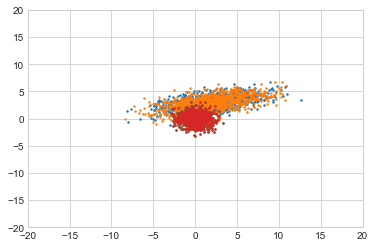

In [493]:
ax = plt.gca()
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.scatter(D[:, 0], D[:, 1], s=2)
ax.scatter(T[:, 0], T[:, 1], s=2)
ax.scatter(T_[:, 0], T_[:, 1], s=2)
ax.scatter(N[:, 0], N[:, 1], s=2)

In [347]:
print X.shape
m1 = tr_utils.mu_cov(X)[0].numpy()
c1 = tr_utils.mu_cov(X)[1].numpy()

m2= np.mean(X.numpy())
c2 = np.cov(X.numpy().T)

print m1, m2
print c1, c2

torch.Size([10, 1])
[[9.560114]] 9.560114
[[21.001017]] 21.00101836976727


In [306]:
norm = X - X.mean(dim=-1, keepdim=True)
norm.t().mm(norm) / (norm.shape[0])

tensor([[ 7.4550, -7.4550],
        [-7.4550,  7.4550]])

In [296]:
np.cov(norm.t())

array([[ 7.45458171, -7.45458166],
       [-7.45458166,  7.45458162]])

In [261]:
opt = SGD(transform.parameters(), lr=0.01, momentum=0.5)

In [348]:
def compute_loss(samples1, samples2):
    M = tr.abs(L[:, None, :] - Y[None, :, :])
    row_loss = tr.min(M, 0)[0].mean()
    col_loss = tr.min(M, 1)[0].mean()
    loss = row_loss + col_loss
    return loss

In [263]:
losses = []

In [268]:
for i in range(5000):
    if i % 500 == 0:
        print 'Step', i
        print transform.means.detach().numpy()
    opt.zero_grad()
    Y = transform.denormalize(N)
    loss = compute_loss(Y, L)
    loss.backward()
    opt.step()
    losses.append(loss.item())

Step 0
[6.5524225 6.905205 ]
Step 500
[6.5999446 6.9392076]
Step 1000
[6.6822667 7.003435 ]
Step 1500
[6.6863494 7.0402513]
Step 2000
[6.6949887 7.0878034]
Step 2500
[6.72322  7.089857]
Step 3000
[6.753099 7.081472]
Step 3500
[6.752736  7.0737576]
Step 4000
[6.749437  7.0724587]
Step 4500
[6.7494187 7.072433 ]


ZParams(means=Parameter containing:
tensor([6.5524, 6.9052], requires_grad=True), cov=Parameter containing:
tensor([[7.9368, 1.7743],
        [1.7743, 7.0497]], requires_grad=True))


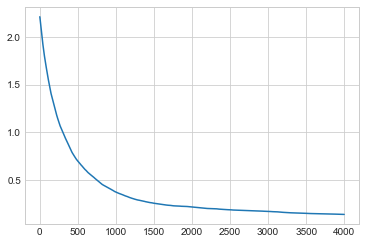

In [267]:
print transform.params
plt.plot(losses)

In [95]:
tr.min(tr.rand(10, 10), dim=-1)

(tensor([0.1652, 0.0478, 0.0660, 0.0756, 0.0046, 0.0471, 0.0281, 0.0221, 0.1933,
         0.0172]), tensor([4, 3, 5, 2, 5, 6, 1, 8, 0, 0]))

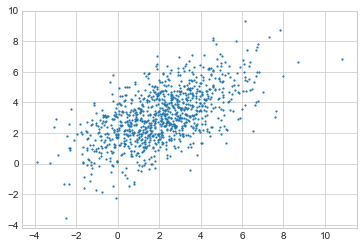

In [39]:
plt.scatter(Y[:, 0], Y[:, 1], s=1.4)
plt.scatter(Y[:, 0], Y[:, 1], s=1.4)

In [36]:
# for i, name in enumerate(style.available):
#     print i, name
st = style.available[14]
style.use(st)
print st
plt.imshow(x[0])

seaborn-whitegrid


NameError: name 'x' is not defined

In [5]:
mnist = MNIST('../data/mnist', download=True)
fashion_mnist = MNIST('../data/fashion', download=True)

train_data, train_labels = tr.load('../data/mnist/processed/test.pt')
test_data, train_labels = tr.load('../data/fashion/processed/test.pt')

In [157]:
from torch.nn import functional as F

In [6]:
Counter(train_labels.numpy())

Counter({0: 980,
         1: 1135,
         2: 1032,
         3: 1010,
         4: 982,
         5: 892,
         6: 958,
         7: 1028,
         8: 974,
         9: 1009})

In [10]:
dl = DataLoader(fmnist.train_data, batch_size=256,)

In [11]:
len(dl)

235

In [12]:
x = fmnist.train_data[:10]
l = fmnist.train_labels[:10]

tensor(9)
tensor(0)
tensor(0)
tensor(3)
tensor(0)
tensor(2)
tensor(7)
tensor(2)
tensor(5)
tensor(5)


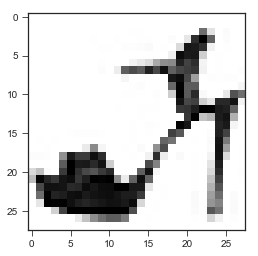

In [13]:
for i in range(10):
    print l[i]
    plt.imshow(x[i])

In [14]:
from dataloaders.multi_normal import NineGaussiansDataLoader

In [15]:
dl = NineGaussiansDataLoader(input_size=2, latent_size=2, supervised=True)

In [17]:
data, labels = dl.random_batch('train', 2048)

AttributeError: 'tuple' object has no attribute 'dtype'

In [18]:
colors = cm.rainbow(np.linspace(0, 1, 10))
print colors.shape
plt.scatter(data[:, 0], data[:, 1], s=5, linewidths=0.2, c=colors[labels.cpu().numpy().astype(int)])

(10, 4)


NameError: name 'data' is not defined

In [37]:
from dataloaders.mnist import MnistDataLoader, FashionMnistDataLoader
from dataloaders.natural import CIFARDataLoader, STLDataLoader

In [39]:
mdl = MnistDataLoader()
fdl = FashionMnistDataLoader()
cdl = CIFARDataLoader()
sdl = STLDataLoader()

Files already downloaded and verified


IOError: [Errno 2] No such file or directory: '../data/cifar10/processed/training.pt'

In [88]:
from torchvision.datasets import CIFAR10, STL10
cifar = CIFAR10('../data/cifar10', download=True, train=False)
stl = STL10('../data/stl10', download=False, split='train')

Files already downloaded and verified
Files already downloaded and verified


In [111]:
stl = STL10('../data/stl10', download=False, split='train+unlabeled')

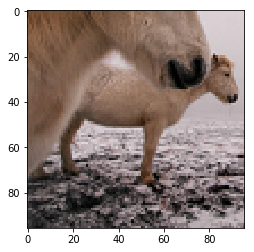

In [116]:
i = 334
img = stl.data[i]
# print cifar.test_labels[i]
plt.imshow(img.transpose([1, 2, 0]));
# from collections import Counter

In [28]:
mx, ml = mdl.next_batch('train')
fx, fl = fdl.next_batch('train')

torch.float32 torch.int64
torch.float32 torch.int64


In [29]:
from matplotlib import pyplot as plt

0


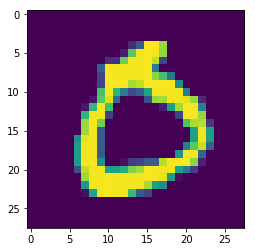

In [34]:
print ml[1].item()
plt.imshow(mx[1]);

3


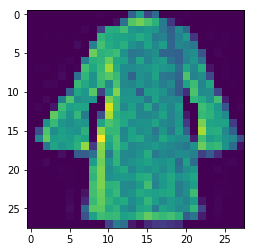

In [36]:
print fl[1].item()
plt.imshow(fx[1]);